# Brown Dwarf Climate Model with Moist Adiabat

In this tutorial we will test another parameter space using a moist adiabat which takes into consideration water latent heat release. You can read more details about the effects of this in [Tang et al. 2021](https://iopscience.iop.org/article/10.3847/1538-4357/ac1e90) for clear and partly cloudy atmospheres, and [Mang et al. 2024](https://iopscience.iop.org/article/10.3847/1538-4357/ad6c4c) for fully cloudy atmospheres.

Here we're just going to test running the model for a clear atmosphere

What you should already be familiar with:
[basics of running/analyzing thermal spectra](https://natashabatalha.github.io/picaso/tutorials.html#basics-of-thermal-emission)

In [1]:
import sys
import os

import warnings
warnings.filterwarnings('ignore')
import picaso.justdoit as jdi
import picaso.justplotit as jpi
jpi.output_notebook()
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Loading BokehJS ...

In [2]:
cl_run = jdi.inputs(calculation="browndwarf", climate = True) # start a calculation

#note you need to put the climate keyword to be True in order to do so
# now you need to add these parameters to your calculation

teff= 350 # Effective Temperature of your Brown Dwarf in K
grav = 100 # Gravity of your brown dwarf in m/s/s

cl_run.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)')) # input gravity
cl_run.effective_temp(teff) # input effective temperature

In [3]:
# Here we're going to run a higher metallicity model since the effect of the latent heat is more pronounced at higher metallicities

mh = '1.0'#'+1.0' #log metallicity
CtoO = '0.46'# # CtoO absolute ratio
ck_db = os.path.join(os.getenv('picaso_refdata'),'opacities', 'preweighted', f'sonora_2121grid_feh{mh}_co{CtoO}.hdf5')

sonora_profile_db = os.path.join(os.getenv('picaso_refdata'),'sonora_grids','bobcat')

# and not the line by line opacities
opacity_ck = jdi.opannection(ck_db=ck_db,method='preweighted') # grab your opacities

In [4]:
nlevel = 91 # number of plane-parallel levels in your code

# let's start with a Sonora Bobcat profile
pressure_bobcat,temp_bobcat = np.loadtxt(jdi.os.path.join(
                            sonora_profile_db,f"t{teff}g{grav}nc_m0.0.cmp.gz"),
                            usecols=[1,2],unpack=True, skiprows = 1)

In [5]:
rcb_guess = 40 # top most level of guessed convective zone

# Here are some other parameters needed for the code.
rfacv = 0.0 #we are focused on a brown dwarf so let's keep this as is

Now we would use the inputs_climate function to input everything together to our cl_run we started. Here we'll make sure to set `moistgrad = True`

In [6]:
cl_run.inputs_climate(temp_guess=temp_bobcat, pressure=pressure_bobcat,
                      rcb_guess=rcb_guess, rfacv=rfacv, moistgrad=True)

In [7]:
out = cl_run.climate(opacity_ck, save_all_profiles=True, with_spec=True)

SUMMARY
-------
Clouds: False
quench False
cold_trap False
vol_rainout False
no_ph3 False
Moist Adiabat: True


Iteration number  0 , min , max temp  91.99209440624465 1825.6031247626179 , flux balance  -0.7181164926065929
Iteration number  1 , min , max temp  92.36987820011838 1854.4039689249219 , flux balance  -0.7060406017317666
Iteration number  2 , min , max temp  92.74106048416043 1883.6815342242712 , flux balance  -0.693439910959913


Iteration number  3 , min , max temp  93.09867664222536 1921.835132632508 , flux balance  -0.6769536158401885
Iteration number  4 , min , max temp  93.45860919343873 1949.8639262885015 , flux balance  -0.6630115251996745
Iteration number  5 , min , max temp  93.82367943922104 1978.1344163392282 , flux balance  -0.6484435595545779
Iteration number  6 , min , max temp  94.18442737958047 2012.4206439992229 , flux balance  -0.6299403035901272
Iteration number  7 , min , max temp  94.55663283740381 2039.9303101400433 , flux balance  -0.6138428186306507
Iteration number  8 , min , max temp  94.93289787901433 2067.373950813431 , flux balance  -0.5969934100028719
Iteration number  9 , min , max temp  95.31277906093065 2094.518152667063 , flux balance  -0.5793638005300101
Iterations exceeded it_max ! sorry 
Big iteration is  95.31277906093065 0


Iteration number  0 , min , max temp  95.69576821167006 2120.335808675403 , flux balance  -0.5609406510484501
Iteration number  1 , min , max temp  96.08139897982535 2146.9146721991883 , flux balance  -0.5416031779074237
Iteration number  2 , min , max temp  96.46892373776471 2173.1290435535398 , flux balance  -0.5213302239768876
Iteration number  3 , min , max temp  96.85754734478058 2198.9112899070496 , flux balance  -0.5000721195029304
Iteration number  4 , min , max temp  97.24634670088386 2224.5576115035387 , flux balance  -0.47777306445170603
Iteration number  5 , min , max temp  97.63422253398376 2250.5426103666364 , flux balance  -0.45427677753681195
Iteration number  6 , min , max temp  98.01960335706366 2276.351805877694 , flux balance  -0.42953925128422465
Iteration number  7 , min , max temp  98.40070466271763 2301.6539694396083 , flux balance  -0.40349818428304424
Iteration number  8 , min , max temp  98.77542406018819 2327.461222887703 , flux balance  -0.3759811121865196


Iteration number  9 , min , max temp  99.06750714305103 2353.3295260116224 , flux balance  -0.3467997974786884
Iterations exceeded it_max ! sorry 
Big iteration is  99.06750714305103 1


Iteration number  0 , min , max temp  99.07556090188426 2379.2978831418623 , flux balance  -0.31581996243507493
Iteration number  1 , min , max temp  99.04291931494087 2405.095604161834 , flux balance  -0.2828953228832644
Iteration number  2 , min , max temp  98.95846295420459 2429.8683722305423 , flux balance  -0.24793551920866963
Iteration number  3 , min , max temp  98.80795789133172 2456.0769438237353 , flux balance  -0.21027395428050402
Iteration number  4 , min , max temp  98.56445494513262 2482.528797509665 , flux balance  -0.16969942332633492
Iteration number  5 , min , max temp  98.18772502382025 2508.5814113030633 , flux balance  -0.12603020490750225
Iteration number  6 , min , max temp  97.60998966550369 2535.7858676727237 , flux balance  -0.07846165705091393


Iteration number  7 , min , max temp  96.6714133290487 2563.2032292252793 , flux balance  -0.02745526364097348
Iteration number  8 , min , max temp  95.32673282177763 2580.7504888722283 , flux balance  0.006874608275903636
Iteration number  9 , min , max temp  95.04410197646378 2576.733355106615 , flux balance  -0.0014257145191580805
In t_start: Converged Solution in iterations  9
Big iteration is  95.04410197646378 2


Iteration number  0 , min , max temp  95.09789902327144 2577.574504458492 , flux balance  0.0003025341853837638
In t_start: Converged Solution in iterations  0
Profile converged before itmx


Iteration number  0 , min , max temp  95.3065151012169 2572.0159959531393 , flux balance  -0.3864433026446367
Iteration number  1 , min , max temp  95.50300735248398 2599.526268148084 , flux balance  -0.3581746455837848
Iteration number  2 , min , max temp  95.68400741409734 2627.7038207751916 , flux balance  -0.3284591142631461
Iteration number  3 , min , max temp  95.84592881384776 2655.728132378057 , flux balance  -0.29722508425052524
Iteration number  4 , min , max temp  95.98426421197478 2683.5405628823796 , flux balance  -0.264318789224207
Iteration number  5 , min , max temp  96.09265841004671 2710.2539810937888 , flux balance  -0.22974814223610618
Iteration number  6 , min , max temp  96.16321743852247 2737.8860837132593 , flux balance  -0.1932693322789819
Iterations exceeded it_max ! sorry 
Big iteration is  96.16321743852247 0


Iteration number  0 , min , max temp  96.18330909529661 2765.3393737943006 , flux balance  -0.15478478831113834
Iteration number  1 , min , max temp  96.1331575341838 2792.604648202768 , flux balance  -0.11425049152490699
Iteration number  2 , min , max temp  95.9794014823341 2818.658155505196 , flux balance  -0.0719108375927954
Iteration number  3 , min , max temp  95.65749839903431 2845.0578447287203 , flux balance  -0.02816518790263915
Iteration number  4 , min , max temp  95.08538622597823 2863.991638151773 , flux balance  0.004553890897215992
Iteration number  5 , min , max temp  94.89002198990808 2861.212086335409 , flux balance  -0.0005988902181637496
In t_start: Converged Solution in iterations  5
Big iteration is  94.89002198990808 1


Iteration number  0 , min , max temp  94.91708679700284 2861.5813876117786 , flux balance  8.104149576414916e-05
In t_start: Converged Solution in iterations  0
Profile converged before itmx


Move up two levels


Iteration number  0 , min , max temp  95.6030010168678 2556.9086609300784 , flux balance  -0.37011005602382896
Iteration number  1 , min , max temp  96.302750943142 2584.8614609821034 , flux balance  -0.34250014247021204
Iteration number  2 , min , max temp  97.00988803603512 2611.9606961348386 , flux balance  -0.31342162187480777
Iteration number  3 , min , max temp  97.72349638485089 2639.8260249734203 , flux balance  -0.2827574334553755
Iteration number  4 , min , max temp  98.44242901601156 2667.7896200347714 , flux balance  -0.250238350361605
Iteration number  5 , min , max temp  99.16474915534408 2695.5859776795683 , flux balance  -0.21568307151325583
Iteration number  6 , min , max temp  99.88751877170156 2723.1420881249014 , flux balance  -0.17882668389851392
Iteration number  7 , min , max temp  100.60582115060528 2752.1005408381106 , flux balance  -0.13897205874152596
Iterations exceeded it_max ! sorry 
Big iteration is  100.60582115060528 0


Iteration number  0 , min , max temp  101.30929159085612 2781.890997661354 , flux balance  -0.09527794580475418
Iteration number  1 , min , max temp  101.97086093184366 2812.710413504829 , flux balance  -0.04583254843277306
Iteration number  2 , min , max temp  102.39623027232814 2846.9325360535236 , flux balance  0.010802938389925982
Iteration number  3 , min , max temp  101.90703291145913 2839.8453408439905 , flux balance  -0.0019636892926308087
In t_start: Converged Solution in iterations  3
Big iteration is  101.90703291145913 1


Iteration number  0 , min , max temp  102.00478213058906 2841.147716482632 , flux balance  0.00037213185176769863
In t_start: Converged Solution in iterations  0
Profile converged before itmx
Move up two levels


Iteration number  0 , min , max temp  102.68722870072885 2539.8591103568383 , flux balance  -0.36813109168248825
Iteration number  1 , min , max temp  103.38167873690946 2569.759088080621 , flux balance  -0.33826252843244464
Iteration number  2 , min , max temp  104.0792294951319 2598.6545689342784 , flux balance  -0.30662106050003457
Iteration number  3 , min , max temp  104.77763742079122 2628.4849603607686 , flux balance  -0.27299579143911823
Iteration number  4 , min , max temp  105.47374195397124 2658.5550761067866 , flux balance  -0.23709582008556232
Iteration number  5 , min , max temp  106.16260290250135 2688.9192202557597 , flux balance  -0.1984434099155908
Iteration number  6 , min , max temp  106.83547500317489 2719.0993567204428 , flux balance  -0.1565120251514325
Iteration number  7 , min , max temp  107.4755895549191 2751.617510840887 , flux balance  -0.10990367158033822
Iterations exceeded it_max ! sorry 
Big iteration is  107.4755895549191 0


Iteration number  0 , min , max temp  108.03640514971543 2786.6528850674376 , flux balance  -0.05593766755163985
Iteration number  1 , min , max temp  108.26755050050014 2828.7728406057545 , flux balance  0.015513413538985573
Iteration number  2 , min , max temp  107.47617178187173 2818.0765998632182 , flux balance  -0.003617229716686399
Iteration number  3 , min , max temp  107.66318635162618 2820.616437024412 , flux balance  0.0008848974968470343
In t_start: Converged Solution in iterations  3
Big iteration is  107.66318635162618 1


Iteration number  0 , min , max temp  107.61851329861568 2819.9993121708476 , flux balance  -0.00021197931588640842
In t_start: Converged Solution in iterations  0
Profile converged before itmx
Move up two levels


Iteration number  0 , min , max temp  108.3544234203004 2515.6006918697576 , flux balance  -0.3752071630113745
Iteration number  1 , min , max temp  109.10900364853376 2559.479811949227 , flux balance  -0.3318090435372678
Iteration number  2 , min , max temp  109.84907309491754 2593.945951669013 , flux balance  -0.29389602867207987
Iteration number  3 , min , max temp  110.5824132852069 2629.0960412166596 , flux balance  -0.25270406162858905
Iteration number  4 , min , max temp  111.30037836412228 2665.530435917413 , flux balance  -0.20738081589572513
Iteration number  5 , min , max temp  111.98600578686404 2702.5709212265306 , flux balance  -0.15642172959568315
Iteration number  6 , min , max temp  112.59640277809663 2743.911157382284 , flux balance  -0.09657111793460668
Iteration number  7 , min , max temp  112.94597817415811 2793.394917484839 , flux balance  -0.01785820915799889
Iterations exceeded it_max ! sorry 
Big iteration is  112.94597817415811 0


Iteration number  0 , min , max temp  112.04475155199756 2807.7857648662703 , flux balance  0.006438771515172555
Iteration number  1 , min , max temp  111.69757379002861 2803.253260001074 , flux balance  -0.001977525315809783
In t_start: Converged Solution in iterations  1
Profile converged before itmx
Move up two levels


Iteration number  0 , min , max temp  112.51789891735537 2499.580467929177 , flux balance  -0.3820053904136567
Iteration number  1 , min , max temp  113.34808458684009 2534.1054660992677 , flux balance  -0.3478135000685353
Iteration number  2 , min , max temp  114.18197107161104 2580.789323305114 , flux balance  -0.2989155227496121
Iteration number  3 , min , max temp  115.0070391561149 2615.9620812319176 , flux balance  -0.2571839572706717
Iteration number  4 , min , max temp  115.82373813227852 2665.0983497978655 , flux balance  -0.1960925990545549
Iteration number  5 , min , max temp  116.59414247184259 2704.8283985193516 , flux balance  -0.14015280299173394
Iteration number  6 , min , max temp  117.2692218511625 2751.3877449918746 , flux balance  -0.07046065894701417


Iteration number  7 , min , max temp  117.04835731081195 2810.9768455855137 , flux balance  0.030077064895376045
Iterations exceeded it_max ! sorry 
Big iteration is  117.04835731081195 0


Iteration number  0 , min , max temp  116.02236321805157 2796.9536695727356 , flux balance  0.0034823744792052995
Iteration number  1 , min , max temp  115.82533019542396 2794.218245549559 , flux balance  -0.0013602225253168045
In t_start: Converged Solution in iterations  1
Big iteration is  115.82533019542396 1


Iteration number  0 , min , max temp  115.89712369350791 2795.299835394407 , flux balance  0.0005410550850380501
In t_start: Converged Solution in iterations  0
Profile converged before itmx
Move up two levels


Iteration number  0 , min , max temp  116.82429221357692 2479.3869561842025 , flux balance  -0.39090137736992553
Iteration number  1 , min , max temp  117.68492886192385 2515.280678571004 , flux balance  -0.3548239263660731
Iteration number  2 , min , max temp  118.54873478320498 2564.389166079681 , flux balance  -0.3036756088850091
Iteration number  3 , min , max temp  119.39988645257341 2602.657311672226 , flux balance  -0.258295834510598
Iteration number  4 , min , max temp  120.2387678008406 2643.4052049353263 , flux balance  -0.20719923299616758
Iteration number  5 , min , max temp  121.04475944284019 2699.0905052879807 , flux balance  -0.13081165220028418
Iteration number  6 , min , max temp  121.58088493686485 2759.1817069126196 , flux balance  -0.03675530338249593


Iteration number  7 , min , max temp  120.52718915862991 2799.599285667947 , flux balance  0.031842786683240275
Iterations exceeded it_max ! sorry 
Big iteration is  120.52718915862991 0


Iteration number  0 , min , max temp  119.50091161843461 2785.4324467865426 , flux balance  0.006335461021694001
Iteration number  1 , min , max temp  119.05912177977139 2780.140556569611 , flux balance  -0.002993137696571434
In t_start: Converged Solution in iterations  1
Big iteration is  119.05912177977139 1


Iteration number  0 , min , max temp  119.21694283873242 2782.6863374031973 , flux balance  0.0014552687017256058
In t_start: Converged Solution in iterations  0
Profile converged before itmx


Iteration number  0 , min , max temp  120.22998552198135 2528.1293515997477 , flux balance  -0.3559141765419546
Iteration number  1 , min , max temp  121.12027162590692 2577.948375603284 , flux balance  -0.3043172300217625


Iteration number  2 , min , max temp  121.99947586883705 2617.1702705790303 , flux balance  -0.25797532425653924
Iteration number  3 , min , max temp  122.86776142401013 2671.162929972753 , flux balance  -0.19057050487143887
Iteration number  4 , min , max temp  123.65696882887151 2720.2008784628065 , flux balance  -0.12037373733560226
Iteration number  5 , min , max temp  124.16933947190758 2798.9078979587043 , flux balance  0.004693813105228742
Iteration number  6 , min , max temp  123.09718716183924 2797.499231514398 , flux balance  0.001886740071068674
Iteration number  7 , min , max temp  122.04335599625126 2796.6249745523332 , flux balance  3.3865920352709945e-05
Iterations exceeded it_max ! sorry 
Big iteration is  122.04335599625126 0


Iteration number  0 , min , max temp  121.6139753482103 2796.720758057845 , flux balance  6.122868412692993e-05
In t_start: Converged Solution in iterations  0
Profile converged before itmx


Iteration number  0 , min , max temp  122.73678535496909 2560.7652902747864 , flux balance  -0.3301219578596893
Iteration number  1 , min , max temp  123.63474935835691 2598.495887393066 , flux balance  -0.2875992859516106
Iteration number  2 , min , max temp  124.53008448174687 2638.1843912002632 , flux balance  -0.24042423064146143
Iteration number  3 , min , max temp  125.41385805841837 2691.8522905944624 , flux balance  -0.17134453122143467
Iteration number  4 , min , max temp  126.20474351896947 2742.758323720844 , flux balance  -0.09669639047986274
Iteration number  5 , min , max temp  126.50986610404146 2829.382666732379 , flux balance  0.04844779916406683
Iteration number  6 , min , max temp  125.45895798602577 2816.418646169059 , flux balance  0.02486441121429527


Iteration number  7 , min , max temp  124.42037548041094 2805.319338695563 , flux balance  0.004000334431101728
Iterations exceeded it_max ! sorry 
Big iteration is  124.42037548041094 0


Iteration number  0 , min , max temp  123.92214609958701 2801.9474444189973 , flux balance  -0.0021400115929883896
In t_start: Converged Solution in iterations  0
Profile converged before itmx


Iteration number  0 , min , max temp  125.10474324459153 2566.1704990820854 , flux balance  -0.32989850436277246
Iteration number  1 , min , max temp  126.00047565539859 2605.0456140618694 , flux balance  -0.28605692905401814
Iteration number  2 , min , max temp  126.89179079617094 2646.0227228001477 , flux balance  -0.23717334660017883
Iteration number  3 , min , max temp  127.76812665428652 2700.4185007475503 , flux balance  -0.16562836518065752
Iteration number  4 , min , max temp  128.5260007786861 2755.8555995428815 , flux balance  -0.08461784910159015
Iteration number  5 , min , max temp  128.42370755696533 2848.9781059466277 , flux balance  0.07483101232557621


Iteration number  6 , min , max temp  127.38989226164702 2831.444712322485 , flux balance  0.04239945498688013
Iteration number  7 , min , max temp  126.36930465250171 2814.141270545772 , flux balance  0.01142522507418803
Iterations exceeded it_max ! sorry 
Big iteration is  126.36930465250171 0


Iteration number  0 , min , max temp  125.75644145104201 2804.4868105105575 , flux balance  -0.006546409822848594
In t_start: Converged Solution in iterations  0
Profile converged before itmx


Iteration number  0 , min , max temp  126.84591703395978 2583.081755109796 , flux balance  -0.32201432130660523
Iteration number  1 , min , max temp  127.75533437519972 2619.9368439053624 , flux balance  -0.27998642368731697
Iteration number  2 , min , max temp  128.66345029795613 2670.6977278436652 , flux balance  -0.2194194362809995
Iteration number  3 , min , max temp  129.54200911859078 2713.053155139162 , flux balance  -0.16164579595257714
Iteration number  4 , min , max temp  130.3667362313807 2775.137853333283 , flux balance  -0.07076766357903369
Iteration number  5 , min , max temp  129.85406567160038 2846.65986650911 , flux balance  0.052075481675967275


Iteration number  6 , min , max temp  128.83062133470673 2828.2480936526313 , flux balance  0.01898594641908073
Iteration number  7 , min , max temp  127.8653113303003 2810.6940410009943 , flux balance  -0.011532890774651803
Iterations exceeded it_max ! sorry 
Big iteration is  127.8653113303003 0


Iteration number  0 , min , max temp  128.48233081176593 2821.6327085544212 , flux balance  0.007391785409944762
In t_start: Converged Solution in iterations  0
Profile converged before itmx


Iteration number  0 , min , max temp  129.6875587666617 2630.201106127271 , flux balance  -0.2821998710045131
Iteration number  1 , min , max temp  130.60622625188165 2679.3797937894265 , flux balance  -0.22399018281706443
Iteration number  2 , min , max temp  131.50568500781804 2719.337777970278 , flux balance  -0.1701176139028297
Iteration number  3 , min , max temp  132.3754022604595 2777.0673049691036 , flux balance  -0.08729612228520013
Iteration number  4 , min , max temp  132.6556288092057 2858.12080463078 , flux balance  0.049936713508707264
Iteration number  5 , min , max temp  131.62513312440507 2841.9260967053074 , flux balance  0.02089220615047561
Iteration number  6 , min , max temp  130.60382496824246 2827.1026180263934 , flux balance  -0.004864219029690001


Iteration number  7 , min , max temp  130.7742262259962 2831.8681842735573 , flux balance  0.003311260617187888
In t_start: Converged Solution in iterations  7
Big iteration is  130.7742262259962 0


Iteration number  0 , min , max temp  130.59928991952071 2828.6579576179192 , flux balance  -0.0022137408067112686
In t_start: Converged Solution in iterations  0
Profile converged before itmx


Iteration number  0 , min , max temp  131.7826432121868 2690.190261024979 , flux balance  -0.23087029234980547
Iteration number  1 , min , max temp  132.70980506305423 2724.30021012681 , flux balance  -0.18587345404714362
Iteration number  2 , min , max temp  133.63156865832272 2773.2466937137997 , flux balance  -0.11826830862376173
Iteration number  3 , min , max temp  134.48180607912968 2819.548652059034 , flux balance  -0.04518615905479838
Iteration number  4 , min , max temp  134.40741593548904 2838.139570428207 , flux balance  -0.014559139439268896
In t_start: Converged Solution in iterations  4
Big iteration is  134.40741593548904 0


Iteration number  0 , min , max temp  133.59321540216789 2853.0289455611182 , flux balance  0.010708429927043498
Iteration number  1 , min , max temp  133.00059931140962 2842.451804498636 , flux balance  -0.007421385671664002
In t_start: Converged Solution in iterations  1
Profile converged before itmx
final [0, 24, 89, 0, 0, 0]


Iteration number  0 , min , max temp  134.23102039901127 2749.5153604618895 , flux balance  -0.16885973792795947
Iteration number  1 , min , max temp  135.15921350917503 2798.0721829931263 , flux balance  -0.09985010802024577
Iteration number  2 , min , max temp  135.98669473695443 2847.996334459699 , flux balance  -0.01955796718560842
Iteration number  3 , min , max temp  135.7774051084359 2852.7660126890355 , flux balance  -0.011619682143436163
In t_start: Converged Solution in iterations  3
Big iteration is  135.7774051084359 0


Iteration number  0 , min , max temp  135.6583911005036 2854.4012422605992 , flux balance  -0.008868979047365777
In t_start: Converged Solution in iterations  0
Profile converged before itmx
YAY ! ENDING WITH CONVERGENCE


Now let's compare the PT profile with the one generated in Tang et al. 2021 to benchmark our model

Text(0.5, 1.0, 'T$_{\\rm eff}$= 350 K, log(g)=4.0')

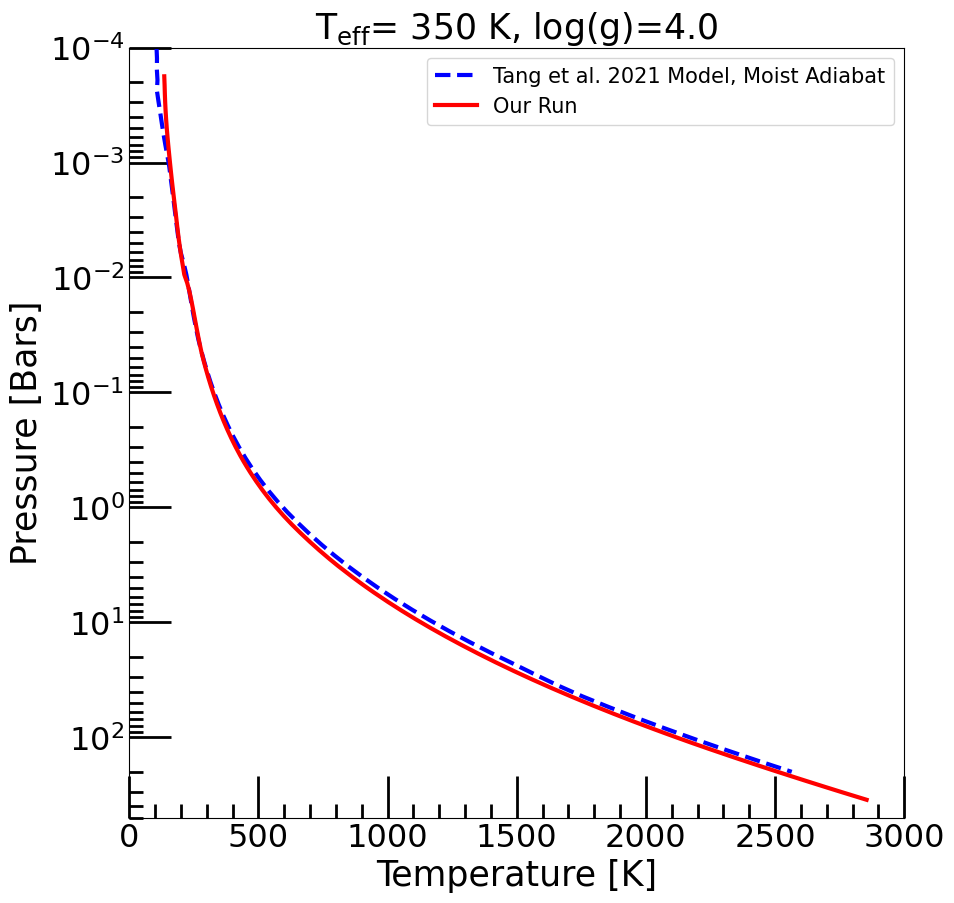

In [8]:
pressure_tang, temp_tang = np.loadtxt("t350g100nc_m1.0.cmp.gz",
                            usecols=[1,3],unpack=True, skiprows = 1)

plt.figure(figsize=(10,10))
plt.ylabel("Pressure [Bars]", fontsize=25)
plt.xlabel('Temperature [K]', fontsize=25)
plt.ylim(500,1e-4)
plt.xlim(0,3000)

# plt.semilogy(temp_bobcat,pressure_bobcat,color="k",linestyle="--",linewidth=3,label="Sonora Bobcat, Dry Adiabat ")
plt.semilogy(temp_tang,pressure_tang,color="b",linestyle="--",linewidth=3,label="Tang et al. 2021 Model, Moist Adiabat")

plt.semilogy(out['temperature'],out['pressure'],color="r",linewidth=3,label="Our Run")

plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

plt.legend(fontsize=15)

plt.title(r"T$_{\rm eff}$= 350 K, log(g)=4.0",fontsize=25)

Overall it looks pretty good! Slight differences are likely due to the difference in the number of layers used (Tang 2021 models use 68 layers and we have 91) as well as the fact that we're using updated ck tables.